In [ ]:
# This file was used to transform data from 'behavioral_no_missing.csv'
# Most column's scores were standardized
# Other columns were log-transformed, based on their skewness and kurtosis values
#


In [1]:
import pandas as pd

# Load behavioral data
behavioral_path = 'behavioral_no_missing.csv'
behavioral_data = pd.read_csv(behavioral_path)

print(behavioral_data.head())

     participant_id  cgi_tot  cssrs_isi  lrtot  madrstot  mcas_total_clean  \
0  NDAR_INVDW733XXB      3.5       23.0   8.63      11.0              76.0   
1  NDAR_INVEV975LY3      2.0       16.0   8.00      15.0              77.0   
2  NDAR_INVKV870NBK      1.0        0.0   9.00       7.0              82.0   
3  NDAR_INVXJ707NAE      0.5        0.0   5.12       0.0              85.0   
4  NDAR_INVWD467AR0      0.5        0.0   4.00       0.0              84.0   

   panss_pos_clean  panss_neg_clean  panss_gen_clean  pdss_tot  ...  \
0             17.0              8.0             20.0       0.0  ...   
1              8.0              7.0             29.0       0.0  ...   
2              7.0              8.0             24.0       0.0  ...   
3              7.0              7.0             16.0       0.0  ...   
4              7.0              7.0             16.0       0.0  ...   

   shaps_total  tmb_dsm_score  tmb_choice_score  tmb_fast_score  \
0          0.0           41.0        

In [2]:
# Checking skewness for all columns in the dataset that likely indicate reaction times
reaction_time_columns = [col for col in behavioral_data.columns if "RT" in col or "reaction" in col]

# Calculating skewness for these columns
reaction_time_skewness = behavioral_data[reaction_time_columns].skew()

# Displaying the skewness values for reaction time columns
reaction_time_skewness

# hammer_faces_medRT_corr     0.457455
# hammer_shapes_medRT_corr    0.559887

# Both reaction time columns show moderate skewness, so log-transforming these 


hammer_faces_medRT_corr     0.457455
hammer_shapes_medRT_corr    0.559887
dtype: float64

In [3]:
# Compute skewness for other columns
# Re-importing necessary libraries and reloading the data
import pandas as pd
from scipy.stats import skew

# Get all column names except 'participant_id'
columns_to_process = [col for col in behavioral_data.columns if col != 'participant_id']

# Calculate skewness for each column (excluding 'participant_id')
skewness_data = {
    "column_name": [],
    "skewness_coefficient": [],
    "skewness_severity": []
}

for column in columns_to_process:
    skew_value = skew(behavioral_data[column])
    skewness_data["column_name"].append(column)
    skewness_data["skewness_coefficient"].append(skew_value)
    # Determine skewness severity
    if -0.5 <= skew_value <= 0.5:
        severity = "no skewness"
    elif -1 <= skew_value < -0.5 or 0.5 < skew_value <= 1:
        severity = "moderate skewness"
    else:
        severity = "highly skewed"
    skewness_data["skewness_severity"].append(severity)

# Convert the results to a DataFrame for clarity
skewness_df = pd.DataFrame(skewness_data)

# Create lists for each severity category
no_skewness = skewness_df[skewness_df["skewness_severity"] == "no skewness"]["column_name"].tolist()
moderate_skewness = skewness_df[skewness_df["skewness_severity"] == "moderate skewness"]["column_name"].tolist()
highly_skewed = skewness_df[skewness_df["skewness_severity"] == "highly skewed"]["column_name"].tolist()

# Display the lists for each skewness category
no_skewness, moderate_skewness, highly_skewed


(['atc_tot_score_clean',
  'bapq_rigid_subscale_ave',
  'bapq_aloof_ave',
  'bapq_prag_lang_ave',
  'bis_f3',
  'bis_f4',
  'bis_fiii',
  'bas_drive',
  'bas_fs',
  'rt_recreational_sum',
  'rt_social_sum',
  'rp_ethical_sum',
  'rp_financial_sum',
  'rp_health_sum',
  'rp_recreational_sum',
  'neo2_score_ag',
  'neo2_score_co',
  'neo2_score_ex',
  'neo2_score_ne',
  'neo2_score_op',
  'staiy_state',
  'staiy_state.1',
  'tci_ns_sum',
  'tci_ha_sum',
  'tci_rd_sum',
  'tci_p_sum',
  'tci_sd_sum',
  'tci_st_sum',
  'pss_totalscore',
  'cerq_sblame',
  'cerq_acceptance',
  'cerq_ruminate',
  'cerq_positive_refocus',
  'cerq_perspective',
  'cerq_catastrophe',
  'cfq_forget_score',
  'cfq_distract_score',
  'crt_3_corr_score',
  'ecrr_anxiety_score',
  'ecrr_avoidance_score',
  'rrs_tot_sum_score',
  'rsri_soc_sch_score',
  'tmb_dsm_score',
  'tmb_fast_score',
  'hammer_faces_medRT_corr'],
 ['cssrs_isi',
  'bis_f1',
  'bis_f2',
  'bis_f5',
  'bis_f6',
  'bis_fi',
  'bis_fii',
  'bissc_to

In [ ]:
# Categorize highly skewed variables into right-skewed or left-skewed
right_skewed = []
left_skewed = []

for column in highly_skewed:
    skew_value = skew(behavioral_data[column])
    if skew_value > 0:
        right_skewed.append(column)
    elif skew_value < 0:
        left_skewed.append(column)

# Print the lists
right_skewed, left_skewed


(['cgi_tot',
  'lrtot',
  'madrstot',
  'panss_pos_clean',
  'panss_neg_clean',
  'panss_gen_clean',
  'pdss_tot',
  'ymrs_tot',
  'ctqcore_ea',
  'ctqcore_pa',
  'ctqcore_pn',
  'ctqcore_sa',
  'ctqcore_val',
  'ftnd_score_total',
  'qvtot',
  'dass_depr_sc',
  'dass_anx_sc',
  'dass_stress_sc',
  'poms_tscore_dep_dej',
  'pum_tot_sum_score',
  'shaps_total',
  'tmb_choice_score'],
 ['mcas_total_clean', 'mspss_fri', 'mspss_so', 'teps_cons_score'])

In [6]:
# Check if all values in the dataset are at least 0 for each column
non_negative_columns = (behavioral_data[columns_to_process] >= 0).all()

# Check overall if all variables contain only values of at least 0
all_non_negative = non_negative_columns.all()

all_non_negative, non_negative_columns.tolist()


(True,
 [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True])

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Select columns
columns_to_process = [col for col in behavioral_data.columns if col != 'participant_id']

# Initialize a dictionary to hold results
distribution_data = {
    "column_name": [],
    "skewness": [],
    "kurtosis": [],
    "skewed_side": [],
    "contains_zero": [],
    "skewness_severity": [],
    "kurtosis_severity": []
}

# Compute skewness, kurtosis, and other metrics for each column
for column in columns_to_process:
    skew_value = skew(behavioral_data[column])
    kurt_value = kurtosis(behavioral_data[column])
    contains_zero = (behavioral_data[column] == 0).any()
    
    # Determine the skewed side
    if skew_value > 0:
        skewed_side = "right"
    elif skew_value < 0:
        skewed_side = "left"
    else:
        skewed_side = "none"
    
    # Determine skewness severity
    if -0.5 <= skew_value <= 0.5:
        skewness_severity = "no skewness"
    elif -1 <= skew_value < -0.5 or 0.5 < skew_value <= 1:
        skewness_severity = "moderate skewness"
    else:
        skewness_severity = "high skewness"
    
    # Determine kurtosis severity
    if -1 <= kurt_value <= 1:
        kurtosis_severity = "no kurtosis"
    elif -2 <= kurt_value < -1 or 1 < kurt_value <= 2:
        kurtosis_severity = "moderate kurtosis"
    else:
        kurtosis_severity = "high kurtosis"
    
    # Append results
    distribution_data["column_name"].append(column)
    distribution_data["skewness"].append(skew_value)
    distribution_data["kurtosis"].append(kurt_value)
    distribution_data["skewed_side"].append(skewed_side)
    distribution_data["contains_zero"].append(contains_zero)
    distribution_data["skewness_severity"].append(skewness_severity)
    distribution_data["kurtosis_severity"].append(kurtosis_severity)

# Create a DataFrame from the results
distribution_df = pd.DataFrame(distribution_data)

# Display the DataFrame
print(distribution_df)


                  column_name  skewness  kurtosis skewed_side  contains_zero  \
0                     cgi_tot  1.127159  0.719293       right          False   
1                   cssrs_isi  0.789874 -0.807571       right           True   
2                       lrtot  1.580583  1.943426       right          False   
3                    madrstot  1.440086  1.195266       right           True   
4            mcas_total_clean -1.556014  2.808234        left          False   
..                        ...       ...       ...         ...            ...   
99              tmb_mer_score -0.761234  0.973393        left          False   
100          tmb_matrix_score -0.504842 -0.728394        left          False   
101            tmb_word_score  0.573763 -0.951569       right          False   
102   hammer_faces_medRT_corr  0.453455  0.117375       right          False   
103  hammer_shapes_medRT_corr  0.554993  0.774188       right          False   

     skewness_severity  kurtosis_severi

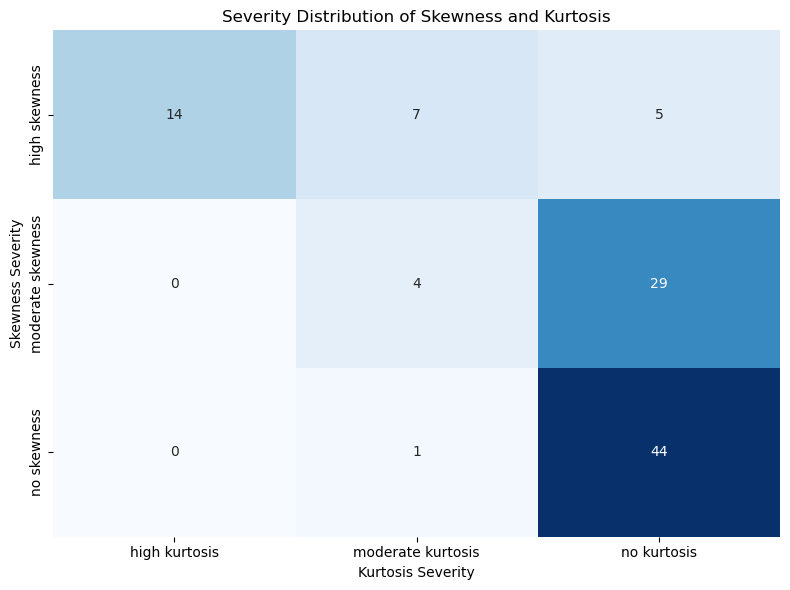

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table for skewness and kurtosis categories
severity_table = pd.crosstab(distribution_df["skewness_severity"], distribution_df["kurtosis_severity"])

# Plot the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(severity_table, annot=True, fmt="d", cmap="Blues", cbar=False)

# Adding labels and title
plt.title("Severity Distribution of Skewness and Kurtosis")
plt.xlabel("Kurtosis Severity")
plt.ylabel("Skewness Severity")

# Save the plot
plt.tight_layout()
plt.savefig("Plots/Skewness_Kurtosis_Distribution.png", dpi=300)

# Display the plot
plt.show()



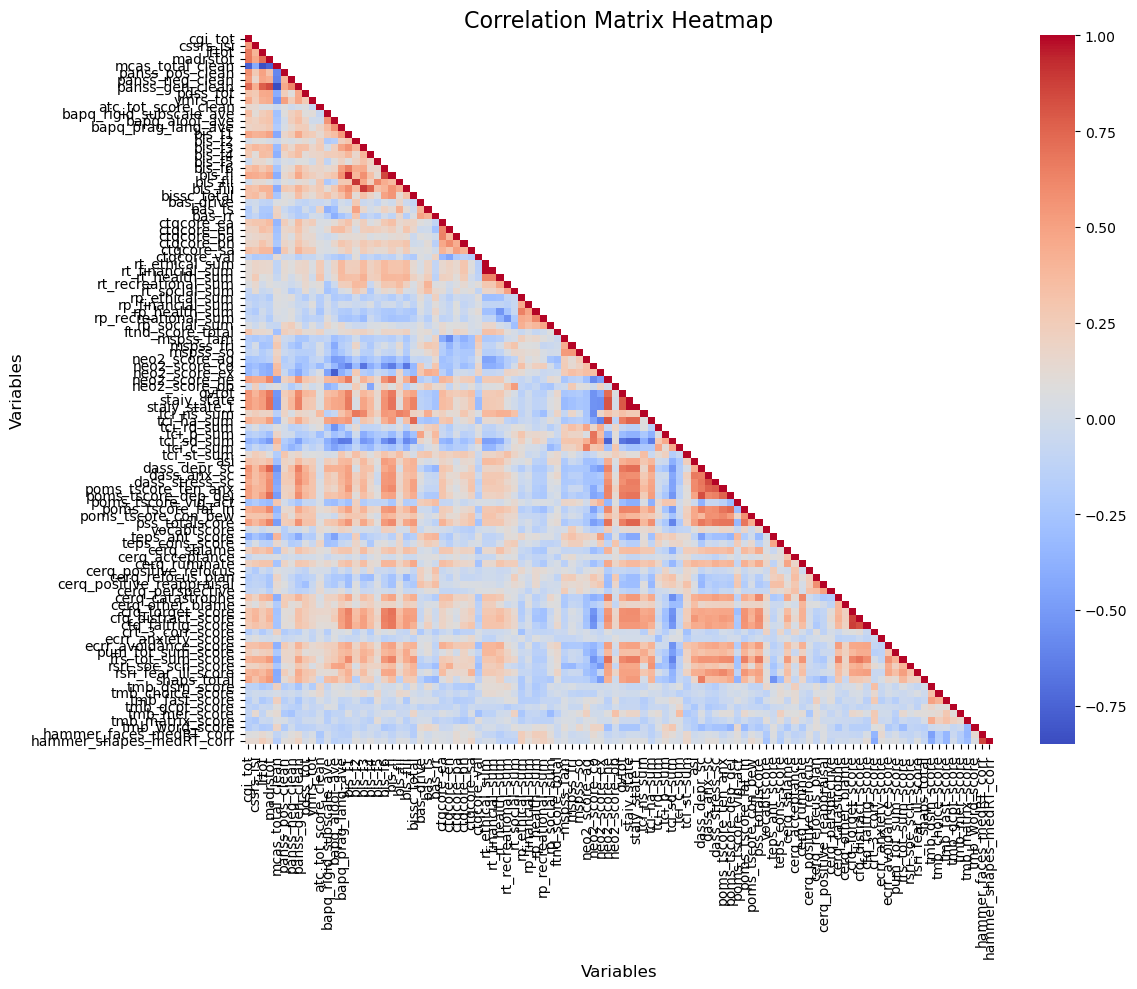

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for the dataset (excluding participant_id)
cor_mat_before_transform = behavioral_data[columns_to_process].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cor_mat_before_transform, annot=False, cmap="coolwarm", cbar=True, 
            xticklabels=True, yticklabels=True, mask=np.triu(cor_mat_before_transform, k=1))

# Adding titles and labels
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Save the plot
plt.tight_layout()
plt.savefig("Plots/Cor_Matrix_Before_Transform.png", dpi=300)

# Show plot
plt.show()


In [ ]:
# Identify pairs of variables with high correlation (> 0.8) or strong negative correlation (< -0.8)
high_correlation_pairs = []

for i in range(len(cor_mat_before_transform.columns)):
    for j in range(i + 1, len(cor_mat_before_transform.columns)):
        corr_value = cor_mat_before_transform.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_correlation_pairs.append({
                "Variable 1": cor_mat_before_transform.columns[i],
                "Variable 2": cor_mat_before_transform.columns[j],
                "Correlation": corr_value
            })

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_correlation_pairs)

# Display the high correlation pairs
high_corr_df


,Variable 1,Variable 2,Correlation
0,lrtot,mcas_total_clean,-0.833258
1,madrstot,panss_gen_clean,0.834222
2,mcas_total_clean,panss_gen_clean,-0.851710
3,bis_f1,bis_fi,0.951534
4,bis_f2,bis_fii,0.899322
5,bis_f3,bis_fiii,0.893141
6,bis_f6,bis_fi,0.852837
7,rt_ethical_sum,rt_financial_sum,0.999387
8,neo2_score_ne,staiy_state,0.807592
9,neo2_score_ne,staiy_state.1,0.807592


In [23]:
# Transform column values based on skewness, zero-based (True/False)
# Import necessary libraries
import numpy as np

# Function to determine and apply the appropriate transformation
def apply_transformation(column, skewness, skewed_side, contains_zero):
    # For high or moderate skewness, apply log transformations based on skew direction
    if abs(skewness) > 0.5:
        if skewed_side == "right":
            if contains_zero:
                # Log(x + 1) transformation for right-skewed data with zeros
                transformed_column = np.log1p(column)
            else:
                # Log(x) transformation for right-skewed data without zeros
                transformed_column = np.log(column)
        elif skewed_side == "left":
            # Reflection + Log transformation for left-skewed data
            reflected_column = column.max() - column + 1
            transformed_column = np.log(reflected_column)
    else:
        # For no skewness or low skewness, apply standardization directly
        transformed_column = column
    
    # Standardize the transformed data to ensure uniform scale
    standardized_column = (transformed_column - transformed_column.mean()) / transformed_column.std()
    
    return standardized_column

# Apply the transformations to the dataset based on the updated plan
transformed_data = behavioral_data.copy()
for _, row in distribution_df.iterrows():
    column_name = row['column_name']
    skewness = row['skewness']
    skewed_side = row['skewed_side']
    contains_zero = row['contains_zero']
    
    transformed_data[column_name] = apply_transformation(
        behavioral_data[column_name],
        skewness,
        skewed_side,
        contains_zero
    )

# Display the transformed DataFrame structure to confirm changes
transformed_data.head()


,participant_id,cgi_tot,cssrs_isi,lrtot,madrstot,mcas_total_clean,panss_pos_clean,panss_neg_clean,panss_gen_clean,pdss_tot,...,shaps_total,tmb_dsm_score,tmb_choice_score,tmb_fast_score,tmb_gcpt_score,tmb_mer_score,tmb_matrix_score,tmb_word_score,hammer_faces_medRT_corr,hammer_shapes_medRT_corr
0,NDAR_INVDW733XXB,2.306113,1.574439,0.838158,0.916317,1.242481,3.661830,-0.144071,-0.037318,-0.318233,...,-0.645072,-0.849124,1.056349,0.540938,0.751967,-0.453258,0.563269,-0.819906,-0.293565,-0.498317
1,NDAR_INVEV975LY3,1.362318,1.305204,0.665134,1.155040,1.139560,0.154196,-0.615958,1.464987,-0.318233,...,2.673965,-2.069362,-1.032427,-1.073739,-0.263947,0.255107,0.950526,-0.674087,0.395295,-0.003110
2,NDAR_INVKV870NBK,0.193322,-0.906832,0.933979,0.579854,0.465285,-0.467185,-0.144071,0.699844,-0.318233,...,-0.645072,-0.645751,-1.148046,-1.265470,-1.141951,0.448655,-0.915604,-1.216394,0.674114,1.485709
3,NDAR_INVXJ707NAE,-0.975673,-0.906832,-0.353535,-1.145704,-0.187457,-0.467185,-0.615958,-0.939532,-0.318233,...,-0.645072,-1.255870,0.140340,-1.412088,-0.782466,0.626701,-0.124368,-0.819906,-0.259244,-0.176760
4,NDAR_INVWD467AR0,-0.975673,-0.906832,-0.917004,-1.145704,0.065752,-0.467185,-0.615958,-0.939532,-0.318233,...,-0.645072,-0.035632,0.478257,0.728909,0.110762,-1.995087,-2.149049,-0.819906,-0.834845,-0.496157


In [24]:
# Create a summary of transformations applied to each column based on the criteria
transformation_summary = {
    "column_name": [],
    "transformation": [],
    "reason": []
}

for _, row in distribution_df.iterrows():
    column_name = row['column_name']
    skewness = row['skewness']
    skewed_side = row['skewed_side']
    contains_zero = row['contains_zero']
    
    # Determine the transformation applied
    if abs(skewness) > 0.5:  # High or Moderate skewness
        if skewed_side == "right":
            if contains_zero:
                transformation = "log(x + 1) + standardization"
                reason = "Right-skewed with zeros present; log(x + 1) corrects skewness and avoids undefined log(0) values."
            else:
                transformation = "log(x) + standardization"
                reason = "Right-skewed without zeros; log(x) corrects skewness."
        elif skewed_side == "left":
            transformation = "reflection + log(x) + standardization"
            reason = "Left-skewed; reflection + log(x) corrects skewness by reversing distribution and reducing asymmetry."
    else:
        transformation = "standardization only"
        reason = "No or low skewness; standardization used to ensure consistent scaling for factor analysis."

    # Append to summary
    transformation_summary["column_name"].append(column_name)
    transformation_summary["transformation"].append(transformation)
    transformation_summary["reason"].append(reason)

# Create a DataFrame for clarity and display it
transformation_summary_df = pd.DataFrame(transformation_summary)

transformation_summary_df.head()


,column_name,transformation,reason
0,cgi_tot,log(x) + standardization,Right-skewed without zeros; log(x) corrects sk...
1,cssrs_isi,log(x + 1) + standardization,Right-skewed with zeros present; log(x + 1) co...
2,lrtot,log(x) + standardization,Right-skewed without zeros; log(x) corrects sk...
3,madrstot,log(x + 1) + standardization,Right-skewed with zeros present; log(x + 1) co...
4,mcas_total_clean,reflection + log(x) + standardization,Left-skewed; reflection + log(x) corrects skew...


In [26]:
# Count the occurrences of each transformation type
transformation_counts = transformation_summary_df["transformation"].value_counts()

# Create a contingency table as a DataFrame
contingency_table = pd.DataFrame({
    "Transformation": transformation_counts.index,
    "Number of Applications": transformation_counts.values
})

# Display the contingency table
contingency_table


,Transformation,Number of Applications
0,standardization only,45
1,log(x) + standardization,31
2,reflection + log(x) + standardization,15
3,log(x + 1) + standardization,13


In [27]:
# Count the expected number of applications based on the criteria from 'distribution_df'
expected_counts = {
    "standardization only": len(distribution_df[(distribution_df["skewness"] >= -0.5) & (distribution_df["skewness"] <= 0.5)]),
    "log(x) + standardization": len(distribution_df[(distribution_df["skewness"] > 0.5) & (distribution_df["skewed_side"] == "right") & (distribution_df["contains_zero"] == False)]),
    "log(x + 1) + standardization": len(distribution_df[(distribution_df["skewness"] > 0.5) & (distribution_df["skewed_side"] == "right") & (distribution_df["contains_zero"] == True)]),
    "reflection + log(x) + standardization": len(distribution_df[(distribution_df["skewness"] < -0.5) & (distribution_df["skewed_side"] == "left")])
}

# Create a DataFrame to compare actual and expected transformation counts
expected_contingency_table = pd.DataFrame({
    "Transformation": expected_counts.keys(),
    "Expected Number of Applications": expected_counts.values()
})

# Merge with actual counts for comparison
comparison_table = contingency_table.merge(expected_contingency_table, on="Transformation", how="left")
comparison_table


,Transformation,Number of Applications,Expected Number of Applications
0,standardization only,45,45
1,log(x) + standardization,31,31
2,reflection + log(x) + standardization,15,15
3,log(x + 1) + standardization,13,13


In [ ]:
# Save transformed data
transformed_data_float32 = transformed_data.copy()
numeric_columns = transformed_data.select_dtypes(include=["float64"]).columns
transformed_data_float32[numeric_columns] = transformed_data[numeric_columns].astype("float32")

# Save the float32 formatted data to a new CSV file
transformed_data_float32.to_csv("behavioral_standardized.csv", index=False)

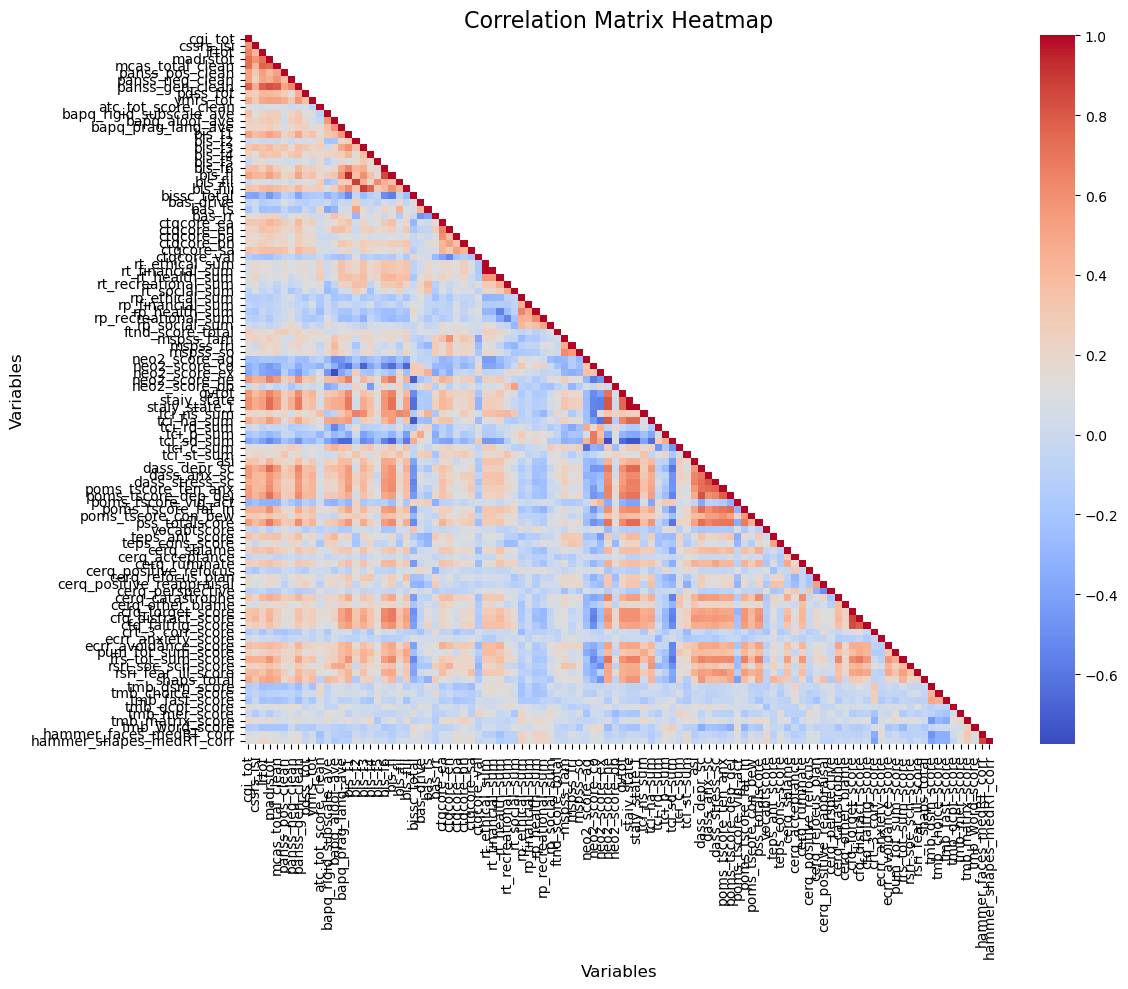

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load transformed behavioral data
behavioral_transformed_path = 'behavioral_standardized.csv'
behavioral_transformed = pd.read_csv(behavioral_transformed_path)

# Compute the correlation matrix for the dataset (excluding participant_id)
cor_mat_after_transform = behavioral_transformed[columns_to_process].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cor_mat_after_transform, annot=False, cmap="coolwarm", cbar=True, 
            xticklabels=True, yticklabels=True, mask=np.triu(cor_mat_after_transform, k=1))

# Adding titles and labels
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Save the plot
plt.tight_layout()
plt.savefig("Plots/Cor_Matrix_After_Transform.png", dpi=300)

# Show plot
plt.show()

In [34]:
# Identify pairs of variables with high correlation (> 0.8) or strong negative correlation (< -0.8)
high_correlation_pairs = []

for i in range(len(cor_mat_before_transform.columns)):
    for j in range(i + 1, len(cor_mat_before_transform.columns)):
        corr_value = cor_mat_before_transform.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_correlation_pairs.append({
                "Variable 1": cor_mat_before_transform.columns[i],
                "Variable 2": cor_mat_before_transform.columns[j],
                "Correlation": corr_value
            })

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_correlation_pairs)

# Display the high correlation pairs
high_corr_df


,Variable 1,Variable 2,Correlation
0,lrtot,mcas_total_clean,-0.833258
1,madrstot,panss_gen_clean,0.834222
2,mcas_total_clean,panss_gen_clean,-0.851710
3,bis_f1,bis_fi,0.951534
4,bis_f2,bis_fii,0.899322
5,bis_f3,bis_fiii,0.893141
6,bis_f6,bis_fi,0.852837
7,rt_ethical_sum,rt_financial_sum,0.999387
8,neo2_score_ne,staiy_state,0.807592
9,neo2_score_ne,staiy_state.1,0.807592


In [ ]:
# Exactly the same, that's a good sign and shows transformation didn't change relative relationships between variables!